# ROC Curves and AUC results

### Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pickle
import matplotlib.pyplot as plt

### Data import

In [3]:
with open('data/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('data/xgb_pred.pkl', 'rb') as f:
    xgb_pred = pickle.load(f)

with open('data/ra_pred.pkl', 'rb') as f:
    ra_pred = pickle.load(f)
    
with open('data/aa_pred.pkl', 'rb') as f:
    aa_pred = pickle.load(f)
    
with open('data/jc_pred.pkl', 'rb') as f:
    jc_pred = pickle.load(f)
    
with open('data/cn_pred.pkl', 'rb') as f:
    cn_pred = pickle.load(f)

with open('data/fi.pkl', 'rb') as f:
    fi_xgb = pickle.load(f)

### Feature importance

#### Features description

1. $CN(u,v) = \mid\Gamma(u)\cap\Gamma(v)\mid$<br><br>
1. $JC(u,v) = \frac{\mid\Gamma(u)\cap\Gamma(v)\mid}{\mid\Gamma(u)\cup\Gamma(v)\mid}$<br><br>
1. $AA(u,v) = \sum\limits_{w \in \Gamma(u)\cap\Gamma(v)}\frac{1}{log(\mid\Gamma(w)\mid)}$<br><br>
1. $RA(u,v) = \sum\limits_{w \in \Gamma(u)\cap\Gamma(v)}\frac{1}{\mid\Gamma(w)\mid}$<br><br>
1. $PA(u,v) = \mid\Gamma(u)\mid \times \mid\Gamma(v)\mid$<br><br>
1. $AR(u,v) = \frac{2(ad-bc)}{(a+b)(b+d)+(a+c)(c+d)}$<br><br>
1. $ND(u,v) = \frac{\mid\Gamma(u)\cap\Gamma(v)\mid}{\sqrt{\mid\Gamma(u)\mid \times \mid\Gamma(v)\mid}}$<br><br>
1. $TN(u,v) = |\Gamma(u)\cup\Gamma(v)|$<br><br>
1. $UD = \mid\Gamma(u)\mid$<br><br>
1. $VD = \mid\Gamma(v)\mid$<br><br>
1. $SC(u,v) =\left\{
    \begin{array}{ll}
        if \quad u \quad and \quad v \quad \in \quad same \quad community  \\
        0 \quad otherwise
    \end{array}
\right.
$<br><br>
*$\Gamma(u) =$ {neighbours of  u}<br><br>

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager


class PlotStyle:
    PRIMARY = '#293847'
    SECONDARY = '#E23B13'
    TERTIARY = '#F3F2E0'
    COLORS = [PRIMARY, SECONDARY, TERTIARY]
    BLUE_1 = '#476079'
    BLUE_2 = '#6F93B4'
    BLUE_3 = '#92B6CC'

    @classmethod
    def cdiscount(cls):
        """
        Turns on `cdiscount <https://cdiscount.com/>`_ style drawing mode.
        This will only have effect on things drawn after this function is
        called.
        For best results, the "Montserrat" font should be installed: it is
        not included with matplotlib.

        Notes
        -----
        This function works by a number of rcParams, so it will probably
        override others you have set before.
        If you want the effects of this function to be temporary, it can
        be used as a context manager, for example::
            with plt.cdiscount():
                # This figure will be in Cdiscount-style
                fig1 = plt.figure()
                # ...
            # This figure will be in regular style
            fig2 = plt.figure()
        """

        if plt.rcParams['text.usetex']:
            raise RuntimeError(
                "cdiscount mode is not compatible with text.usetex = True")

        font_manager._rebuild()

        cdiscount_ctx = plt.rc_context({
            'font.family': ['Montserrat', 'Arial', 'DejaVu Sans'],
            'font.serif': ['Montserrat', 'serif', 'DejaVu Serif'],
            'font.size': 11.0,
            'lines.linewidth': 2.0,
            'figure.facecolor': 'white',
            'grid.linewidth': 1.0,
            'grid.color': '#F0F0F0',
            'axes.grid': True,
            'axes.unicode_minus': False,
            'axes.edgecolor': cls.PRIMARY,
            'axes.labelcolor': cls.PRIMARY,
            'axes.facecolor': 'white',
            'axes.linewidth': 1.5,
            'axes.axisbelow': True,
            'xtick.major.size': 8,
            'xtick.major.width': 3,
            'xtick.color': cls.PRIMARY,
            'ytick.color': cls.PRIMARY,
            'ytick.major.size': 8,
            'ytick.major.width': 3,
        })
        cdiscount_ctx.__enter__()

        # In order to make the call to `cdiscount` that does not use a context manager
        # (cm) work, we need to enter into the cm ourselves, and return a dummy
        # cm that does nothing on entry and cleans up the cdiscount context on exit.
        # Additionally, we need to keep a reference to the dummy cm because it
        # would otherwise be exited when GC'd.

        class dummy_ctx(object):
            def __enter__(self):
                pass

            __exit__ = cdiscount_ctx.__exit__

        return dummy_ctx()

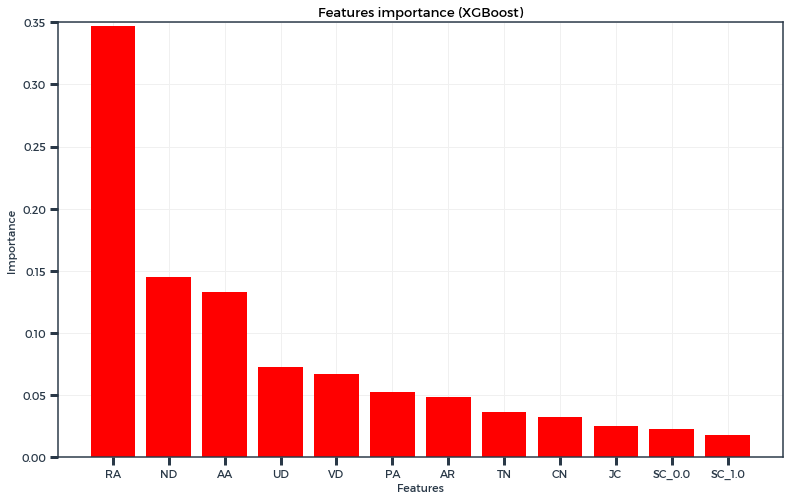

In [8]:
importance = fi_xgb[1]
features = fi_xgb[0]
indices = np.argsort(fi_xgb[1])[::-1]

with PlotStyle.cdiscount():
    fig=plt.figure(figsize=(13,8))
    plt.bar(range(fi_xgb.shape[1]),height=importance[indices], align='center',color='r')
    plt.title('Features importance (XGBoost)')
    plt.xticks(range(fi_xgb.shape[1]), features[indices])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.ylim((0, 0.35))
    fig.savefig('feature_importance_xgb.png')
    plt.show()

### Accuracy summary

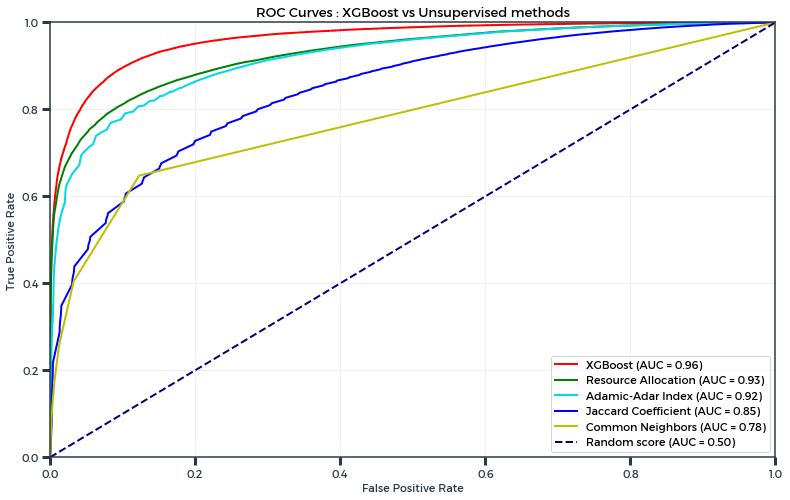

In [9]:
fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, xgb_pred[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_ra, tpr_ra, threshold = roc_curve(y_test, ra_pred)
roc_auc_ra = auc(fpr_ra, tpr_ra)
fpr_aa, tpr_aa, threshold = roc_curve(y_test, aa_pred)
roc_auc_aa = auc(fpr_aa, tpr_aa)
fpr_jc, tpr_jc, threshold = roc_curve(y_test, jc_pred)
roc_auc_jc = auc(fpr_jc, tpr_jc)
fpr_cn, tpr_cn, threshold = roc_curve(y_test, cn_pred)
roc_auc_cn = auc(fpr_cn, tpr_cn)

with PlotStyle.cdiscount():
    fig=plt.figure(figsize=(13,8))
    plt.title('ROC Curves : XGBoost vs Unsupervised methods')
    plt.plot(fpr_xgb, tpr_xgb, 'r', label = 'XGBoost (AUC = %0.2f)' % roc_auc_xgb)
    plt.plot(fpr_ra, tpr_ra, 'g', label = 'Resource Allocation (AUC = %0.2f)' % roc_auc_ra)
    plt.plot(fpr_aa, tpr_aa, 'xkcd:aqua blue', label = 'Adamic-Adar Index (AUC = %0.2f)' % roc_auc_aa)
    plt.plot(fpr_jc, tpr_jc, 'b', label = 'Jaccard Coefficient (AUC = %0.2f)' % roc_auc_jc)
    plt.plot(fpr_cn, tpr_cn, 'y', label = 'Common Neighbors (AUC = %0.2f)' % roc_auc_cn)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random score (AUC = 0.50)')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    fig.savefig('roc_curves.png')
    plt.show()